In [ ]:
# Linear Regression Analysis of house loan data
# data downloaded from https://github.com/sshumiye/Notes

In [ ]:
# Exploring and visualizing data
# Create and train a Linear Regression model
# Evaluate model and make predictions
# Calculate Root Mean Square Error (RMSE)

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

In [8]:
house = pd.read_csv("C:\\Users\\Ritesh Mohan Monga\\Documents\\home_data.csv")

In [9]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [11]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'price of house')

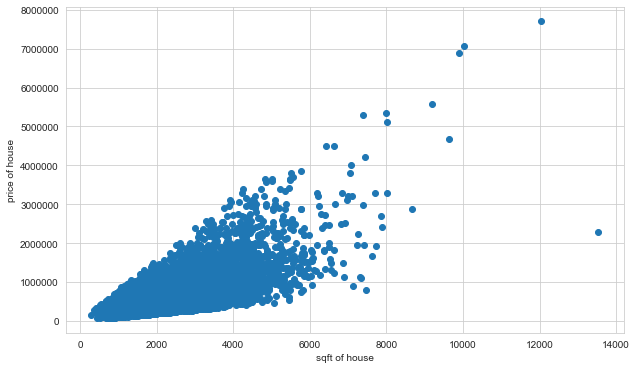

In [176]:
plt.figure(figsize = (10, 6))
plt.scatter(house.sqft_living, house.price)
plt.xlabel('sqft of house')
plt.ylabel('price of house')

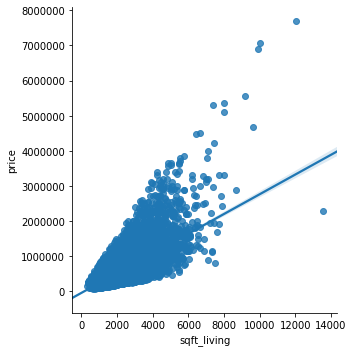

In [19]:
sns.lmplot("sqft_living", 'price', data = house)

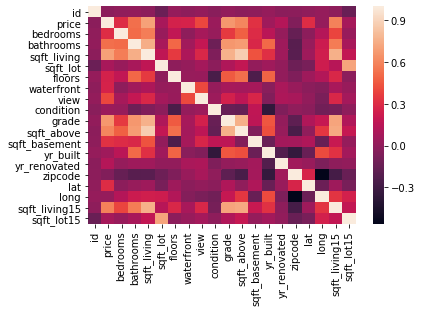

In [20]:
 sns.heatmap(house.corr())

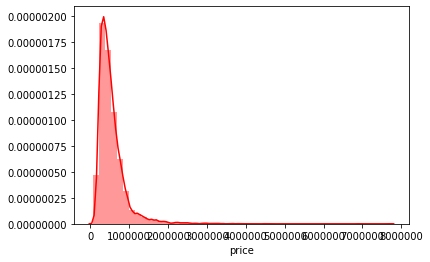

In [22]:
sns.distplot(house['price'], color = 'red')

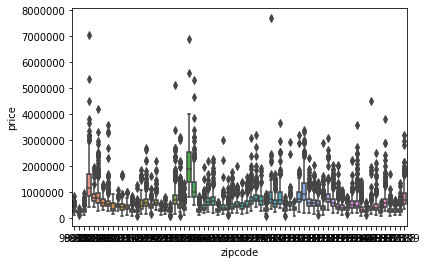

In [23]:
sns.boxplot(x = 'zipcode', y = 'price', data = house)

In [152]:
# Linear Regression Model
# considering 10 features out of 21 to train model
X1 = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
          'sqft_lot15', 'yr_built', 'condition', 'zipcode']] #2d array
y = house['price'] #1d array

In [30]:
from sklearn.model_selection import train_test_split

In [151]:
# training 70%, testing 30%
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 7)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [150]:
model.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
prediction1 = model.predict(X1_test)

Text(0, 0.5, 'prediction')

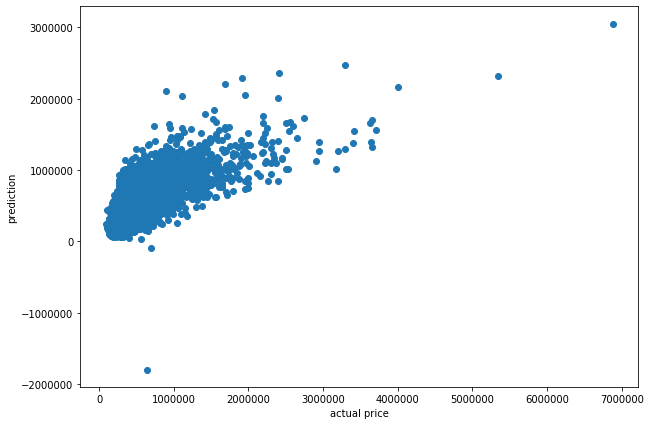

In [154]:
# scatterplot to find relationship between predicted and actual values
plt.figure(figsize = (10, 7))
plt.scatter(y_test, prediction1)
plt.xlabel("actual price")
plt.ylabel("prediction")

# examining effect of each feature on target 
dframe_coef = pd.DataFrame(model.coef_, X1.columns, columns = ['Coeff Value'])

In [106]:
dframe_coef

,Coeff Value
bedrooms,-75857.342535
bathrooms,69668.263452
sqft_living,293.038297
sqft_lot,-0.121471
floors,55310.401451
sqft_above,18.722747
sqft_lot15,-0.514845
yr_built,-3303.714393
condition,18595.853340
zipcode,92.543873


In [42]:
# RMSE
from sklearn import metrics

In [148]:
mean_sq_error1 = metrics.mean_squared_error(y_test, prediction)

In [133]:
RMSE1 = np.sqrt(mean_sq_error1)

In [147]:
# Building another model, model2, with 6 features
X2 = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'zipcode']] 
y = house['price'] 
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 7) 

In [97]:
model2 = LinearRegression()

In [145]:
model2.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
prediction2 = model2.predict(X2_test)

In [80]:
prediction2[1]

718281.2079601055

In [81]:
prediction[1]

724004.5295811333

In [84]:
house['price'][1]

538000

In [144]:
mean_sq_error2 = metrics.mean_squared_error(y_test, prediction2)

In [116]:
RMSE2 = np.sqrt(mean_sq_error2)

In [117]:
RMSE2


248257.08523322942

In [89]:
RMSE

247262.41780749767

In [90]:
# based on RMSE value, first model predicts better => more features better prediction
# model 2 predicts price better for id = 1, it doesn't apply to all

In [91]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [140]:
# Model 3 with 15 features
X3 = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 
          'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'condition', 'zipcode' ]] 
y = house['price'] 

In [142]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3, random_state = 7)

In [109]:
model3 = LinearRegression()

In [143]:
model3.fit(X3_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
prediction3 = model3.predict(X3_test)

In [114]:
prediction3[1]

728378.258696638

In [139]:
mean_sq_error3 = metrics.mean_squared_error(y_test, prediction3)

In [119]:
RSME3 = np.sqrt(mean_sq_error3)

In [120]:
RSME3

235005.93807890158

In [136]:
RMSE2

248257.08523322942

In [137]:
RMSE1

247262.41780749767

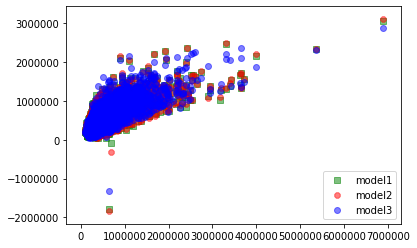

In [174]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(y_test, prediction1, c='green', marker="s", label='model1', alpha = '0.5')
ax1.scatter(y_test, prediction2, c='red', marker="8", label='model2', alpha = '0.5')
ax1.scatter(y_test, prediction3, c='blue', marker="o", label='model3', alpha = '0.5')

plt.legend(loc='lower right')
